# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np # it is used for matric statistic Mathematics
import matplotlib.pyplot as plt #it is used for visualization
import pandas as pd # it is used for data cleaning and data analysis

## Importing the dataset

In [2]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head(20)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
dataset.describe(include='object') #statistical information on column type string

,State
count,50
unique,3
top,New York
freq,17


In [6]:
dataset['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [7]:
dataset.iloc[5,:] #row 5 all columns

R&D Spend           131876.9
Administration      99814.71
Marketing Spend    362861.36
State               New York
Profit             156991.12
Name: 5, dtype: object

In [8]:
dataset.iloc[0:5,:]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
dataset.iloc[:,-1]

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [10]:
#We have to create the x=independent valriable
#We have to create the Y=Dependent varaible

In [9]:
X = dataset.iloc[:, :-1].values # it will take the values of each column except the last column
y = dataset.iloc[:, -1] # it will take the values of only 

In [12]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [10]:
print(y)

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64


## Encoding categorical data

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

## Training the Multiple Linear Regression model on the Training set

In [13]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()#creating the object of the LinearRegression
regressor.fit(X_train, y_train) #method fit to start the training

LinearRegression()

In [15]:
#predict the test
pretcited_value=regressor.predict(X_test)


In [16]:
pretcited_value

array([ 89173.72784126, 110171.90144926,  65822.47758035,  70785.2114258 ,
        47652.12694004, 116303.59665193, 172176.2800355 , 100657.06254108,
       160473.25265876, 158835.62246239])

In [17]:
#Model Evaluation
print("Intercept",regressor.intercept_)
print("Co Efficent",regressor.coef_)

Intercept 50001.736040840486
Co Efficent [ 8.41023126e+01  6.95447747e+02 -7.79550060e+02  8.05859453e-01
 -1.79706621e-02  2.28153524e-02]


In [18]:
#MSE
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
print("R2 Score ",r2_score(y_test,pretcited_value))
print("MSE Score ",mean_squared_error(y_test,pretcited_value))
print("RMSE Score ",np.sqrt(mean_squared_error(y_test,pretcited_value)))


R2 Score  0.9901105113397809
MSE Score  17941201.053959154
RMSE Score  4235.705496603742


# Adujusted R2  Value Formula



In [23]:
# X.shape[1]
# len(y)
print('column', X.shape[1])
print('row', len(y))

column 6
row 50


In [18]:
adjr2=1-(1-r2_score(y_test,pretcited_value))*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted r2",adjr2)

Adjusted r2 0.9887305826895177


In [19]:
newdf=pd.DataFrame(columns=["Actual Value","Predicted","Error"])

In [20]:
newdf['Actual Value']=y_test
newdf['Predicted']=pretcited_value
newdf['Error']=newdf['Predicted']-newdf['Actual Value']

In [21]:
newdf

,Actual Value,Predicted,Error
37,89949.14,89173.727841,-775.412159
23,108733.99,110171.901449,1437.911449
44,65200.33,65822.477580,622.147580
42,71498.49,70785.211426,-713.278574
47,42559.73,47652.126940,5092.396940
20,118474.03,116303.596652,-2170.433348
3,182901.99,172176.280035,-10725.709965
30,99937.59,100657.062541,719.472541
7,155752.60,160473.252659,4720.652659
6,156122.51,158835.622462,2713.112462


# Equations 
Objective of Linear Regression is to minimize the cost function: 
<br>
$\Large J(\theta) = \frac{1}{2m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2$
<br>
<br>
where the hypothesis $h_\theta(x)$ is given by the lienar model:  

$\Large h_\theta(x) = \theta^T X = \theta_1 X_1 + \theta_0 $  
<br>
In batch gradient descent, each iteration performs the update:  
$\Large \theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta (x^{(i)}) - y^{(i)})x_j^{(i)}$

In [29]:
def computeCost(x, y, theta):
    m = len(y)
    h_x = x.dot(theta)
    j = np.sum(np.square(h_x - y))*(1/(2*m))
    return j

In [32]:
def gradientDescent(x, y, theta, alpha, iteration):
    print('Running Gradient Descent...')
    j_hist = [] #Empty List
    m = len(y)
    for i in range(iteration):
        j_hist.append(computeCost(X, y, theta))
        h_x = x.dot(theta)
        theta = theta - ((alpha/m) *((np.dot(x.T, (h_x-y) ))))
        #theta[0] = theta[0] - ((alpha/m) *(np.sum((h_x-y))))
    return theta, j_hist

In [35]:
def featureNormalize(x_m):
    mu = np.zeros((1,x_m.shape[1]))
    sigma = np.zeros((1,x_m.shape[1]))
    x_norm = x_m.astype(float)
    
    for i in range(0,len(mu)+1):
        mu[:,i] = x_m[:,i].mean()
        sigma[:,i] = x_m[:,i].std()
        x_norm[:,i] = (x_m[:,i] - mu[:,i])/sigma[:,i]
    return (x_norm, mu, sigma)

In [36]:
x_norm, mu, sigma = featureNormalize(X)
x_norm = np.concatenate((np.ones(len(x_norm)).reshape(-1,1), x_norm), axis=1)

In [37]:
def computeCost_m(x, y, theta):
    m = len(y)
    h_x = np.dot(x, theta)
    j = np.sum(np.square(h_x - y))/(2*m)
    return j

In [42]:
len(x_norm)

50

In [47]:
np.zeros((7, 1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [45]:
y=y.values

In [46]:
theta_init = np.zeros((7, 1))
computeCost_m(x_norm, y, theta_init)

353473193762.30896

In [49]:
def gradientDescentMulti(X, Y, theta, alpha, num_iters):
    m = len(Y)
    p = np.copy(X)
    t = np.copy(theta)
    j = []
    print('Running Gradient Descent')
    for i in range(0,num_iters+1):
        cost = computeCost_m(p, Y, t)
        j.append(cost)
        h_x = np.dot(p, t)
        err = h_x - Y
        for f in range(theta.size):
            t[f] = t[f] - alpha/m *(np.sum((np.dot(p[:,f].T, err))))
    return j, t

Running Gradient Descent


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


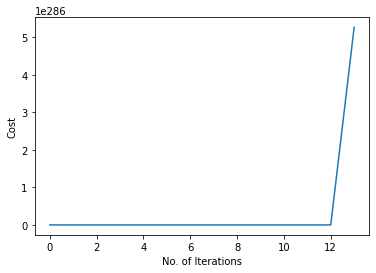

In [52]:
# theta_init = np.zeros((3, 1))
alpha = 0.01
num_iters = 5000
theta_init = np.zeros((7, 1))
cost, theta_final = gradientDescentMulti(x_norm, y, theta_init, alpha, num_iters)

plt.figure()
plt.plot(cost)
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')
plt.show()

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

## Predicting the Test set results

In [22]:

print(X_train[:,3])

[38558.51 153441.51 28754.33 63408.86 101913.08 78389.47 46014.02 72107.6
 91749.16 61136.38 162597.7 93863.75 46426.07 1000.23 75328.87 131876.9
 91992.39 73994.56 86419.7 94657.16 119943.24 142107.34 27892.92 55493.95
 77044.01 100671.96 20229.59 78013.11 542.05 1315.46 0.0 120542.52
 15505.73 65605.48 64664.71 66051.52 165349.2 114523.61 28663.76 123334.88]


In [26]:
y_pred = regressor.predict(X_test)

newdf=pd.DataFrame(columns=["Actual Value","Predicted","Error"])
newdf['Actual Value']=y_test
newdf['Predicted']=y_pred
newdf['Error']=newdf['Predicted']-newdf['Actual Value']
newdf

,Actual Value,Predicted,Error
37,89949.14,89173.727841,-775.412159
23,108733.99,110171.901449,1437.911449
44,65200.33,65822.477580,622.147580
42,71498.49,70785.211426,-713.278574
47,42559.73,47652.126940,5092.396940
20,118474.03,116303.596652,-2170.433348
3,182901.99,172176.280035,-10725.709965
30,99937.59,100657.062541,719.472541
7,155752.60,160473.252659,4720.652659
6,156122.51,158835.622462,2713.112462


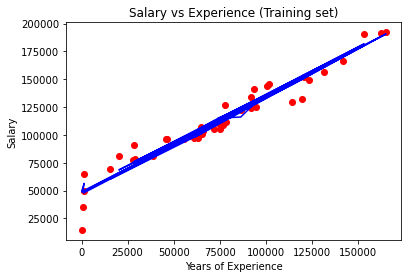

In [27]:
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

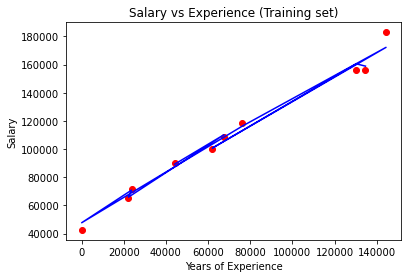

In [28]:
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], regressor.predict(X_test), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
dataset.head()